## Problem Statement - 37, Set 3

In [2]:
# Import necessary libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import altair as alt
import sklearn
import nltk
from spacy import displacy
from nltk.tokenize import TreebankWordTokenizer as twt

## Data Load and Overview

In [3]:
#Load Data
data = pd.read_csv("C:/BITsPilaniMTECH2123/Sem3/NLP/Assignment1/stack-overflow-data.csv")
data.head(3).style.background_gradient(cmap='GnBu')

#Observation and inference:
# We are using stack-overflow-data dataset, Which has post and tags columns. 
# We will be predicting tags based on posts text data

,post,tags
0,what is causing this behavior in our c# datetime type [test] public void sadness() { var datetime = datetime.utcnow; assert.that(datetime is.equalto(datetime.parse(datetime.tostring()))); } failed : expected: 2011-10-31 06:12:44.000 but was: 2011-10-31 06:12:44.350 i wish to know what is happening behind the scenes in tostring() etc to cause this behavior. edit after seeing jon s answer : [test] public void newsadness() { var datetime = datetime.utcnow; assert.that(datetime is.equalto(datetime.parse(datetime.tostring( o )))); } result : expected: 2011-10-31 12:03:04.161 but was: 2011-10-31 06:33:04.161 same result with capital and small o . i m reading up the docs but still unclear.,c#
1,have dynamic html load as if it was in an iframe i have an asp.net 4.0 site. users can save an entire html page into the backend database. what i want to do is load the dynamic content into a div on an existing page in a content area and have a couple of things to happen: i do not want any of the css to affect anything outside the div when first trying this out loading of some badly formed html would move images and other divs outside the content area around. a lot of these html pages use the base tag for images and links i want the base tag respected inside the div. i have a solution that i am going to try which is just to use an iframe and set its url to another child page that loads the dynamic html into its own page entirely. i am just wondering if there is a better solution.,asp.net
2,how to convert a float value in to min:sec i m trying to convert my second in min:sec. my code is: - (ibaction)calcola:(id)sender { float grandezzakb= [[fieldgrandezza text] floatvalue]; float velocitambps= [[fieldvelocita text] floatvalue] ; float grandezzamb= grandezzakb*1000; float velocitakb = velocitambps*128; float seconditotali = grandezzamb/velocitakb; float min = seconditotali / 60; nsstring *risultato = [nsstring stringwithformat:@ %.02f minuti min]; [labelrisultato settext:risultato]; } sorry if it isn t english but i m italian :d someone can help me i ve already tried with the mod but it doesn t work with float :( sorry if the code isn t perfect but i m a newbie :),objective-c


In [4]:
#Dataset Information

data.info()

#Observation and inference:
# Column post and tags both are object data type, with 40K records and without NULLs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   post    40000 non-null  object
 1   tags    40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB


In [5]:
#Dataset describtion

data.describe()

#Observation and inference:
# Post has 40K records and all of then are unique with 1 frequency each
# Tags has 40k records and 20 unique tags with 2000 frequency each

,post,tags
count,40000,40000
unique,40000,20
top,what is causing this behavior in our c# datet...,c#
freq,1,2000


In [6]:
#Count of target levels

data.tags.value_counts()

#Observation and inference:
#List of tags names and their frequency counts

c#               2000
asp.net          2000
javascript       2000
mysql            2000
android          2000
php              2000
c++              2000
css              2000
jquery           2000
java             2000
sql              2000
c                2000
ios              2000
ruby-on-rails    2000
iphone           2000
angularjs        2000
python           2000
.net             2000
objective-c      2000
html             2000
Name: tags, dtype: int64

In [7]:
#Converting tags text values to numberical

data['tags_num']= pd.factorize(data['tags'])[0]
data.tail()

#Observation and inference:
# Fractorize tags names into numbers, so that it can be understood by ML

,post,tags,tags_num
39995,different output if at end of function rather ...,c++,14
39996,multiple arrays is there a way to access/stor...,iphone,6
39997,c - how to differentiate a second same key pre...,c,9
39998,state.go not working (#! & url is being append...,angularjs,5
39999,understanding the mechanisms of intentservice ...,android,16


In [8]:
#Text cleaning 

#Removal of Punctuation
pd.options.display.max_colwidth = 1000
data['clean_post']=data['post'].str.replace('[^\w\s]','')
data.head(1)

#Observation and inference:
# Removing Punctuation from the string/each cell of post columns via string replace function
# As Punctuation would not be conyributing towards tags classfications

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_13204\4042135610.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['clean_post']=data['post'].str.replace('[^\w\s]','')


,post,tags,tags_num,clean_post
0,what is causing this behavior in our c# datetime type <pre><code>[test] public void sadness() { var datetime = datetime.utcnow; assert.that(datetime is.equalto(datetime.parse(datetime.tostring()))); } </code></pre> failed : <pre><code> expected: 2011-10-31 06:12:44.000 but was: 2011-10-31 06:12:44.350 </code></pre> i wish to know what is happening behind the scenes in tostring() etc to cause this behavior. edit after seeing jon s answer : <pre><code>[test] public void newsadness() { var datetime = datetime.utcnow; assert.that(datetime is.equalto(datetime.parse(datetime.tostring( o )))); } </code></pre> result : <pre><code>expected: 2011-10-31 12:03:04.161 but was: 2011-10-31 06:33:04.161 </code></pre> same result with capital and small o . i m reading up the docs but still unclear.,c#,0,what is causing this behavior in our c datetime type precodetest public void sadness var datetime datetimeutcnow assertthatdatetime isequaltodatetimeparsedatetimetostring codepre failed precode expected 20111031 061244000 but was 20111031 061244350 codepre i wish to know what is happening behind the scenes in tostring etc to cause this behavior edit after seeing jon s answer precodetest public void newsadness var datetime datetimeutcnow assertthatdatetime isequaltodatetimeparsedatetimetostring o codepre result precodeexpected 20111031 120304161 but was 20111031 063304161 codepre same result with capital and small o i m reading up the docs but still unclear


In [9]:
#Removal of Stop Words

stop = stopwords.words('english')
data['clean_post'] = data['clean_post'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data.head(1)

#Observation and inference:
# Removing Stop Words from the string/each cell of post columns from list of stopwords present in nltk via apply function
# As Stop word would not be conyributing towards tags classfications

,post,tags,tags_num,clean_post
0,what is causing this behavior in our c# datetime type <pre><code>[test] public void sadness() { var datetime = datetime.utcnow; assert.that(datetime is.equalto(datetime.parse(datetime.tostring()))); } </code></pre> failed : <pre><code> expected: 2011-10-31 06:12:44.000 but was: 2011-10-31 06:12:44.350 </code></pre> i wish to know what is happening behind the scenes in tostring() etc to cause this behavior. edit after seeing jon s answer : <pre><code>[test] public void newsadness() { var datetime = datetime.utcnow; assert.that(datetime is.equalto(datetime.parse(datetime.tostring( o )))); } </code></pre> result : <pre><code>expected: 2011-10-31 12:03:04.161 but was: 2011-10-31 06:33:04.161 </code></pre> same result with capital and small o . i m reading up the docs but still unclear.,c#,0,causing behavior c datetime type precodetest public void sadness var datetime datetimeutcnow assertthatdatetime isequaltodatetimeparsedatetimetostring codepre failed precode expected 20111031 061244000 20111031 061244350 codepre wish know happening behind scenes tostring etc cause behavior edit seeing jon answer precodetest public void newsadness var datetime datetimeutcnow assertthatdatetime isequaltodatetimeparsedatetimetostring codepre result precodeexpected 20111031 120304161 20111031 063304161 codepre result capital small reading docs still unclear


## EDA

In [10]:
# CountVectorizer Using scikit-learn

cv_model = CountVectorizer(stop_words="english", analyzer='word',ngram_range=(1, 1), max_df=0.99, min_df=0.001, max_features=100000)
cv_vector = cv_model.fit_transform(data['clean_post'])
print(type(cv_vector), cv_vector.shape)

#Observation and inference:
# Using CountVectorizer as mentioned in question for work embedding.
# In CountVectorizer list of unique words is created and for each document or rows words requency count is present.
# We have taken max words to be 50K its based on document frequency of words

<class 'scipy.sparse._csr.csr_matrix'> (40000, 4080)


In [11]:
#Converting Matrix into dataframe for viewing

cv_array = cv_vector.toarray()
words_set = cv_model.get_feature_names_out()
df_cv = pd.DataFrame(cv_array, columns = words_set)
print("Shape: ",df_cv.shape)
df_cv.sample(3)

#Observation and inference:
# List of words(4080 columns) and their frequency count in each rows

Shape:  (40000, 4080)


,00,000,0000,000000,001,01,02,03,04,05,...,ymd,yn,youtube,yyyymmdd,zero,zeros,zindex,zip,zone,zoom
2859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Visualize CountVectorizer

cv_slice=df_cv.sort_index().round(decimals=2).sample(30)
cv_slice = cv_slice.stack().reset_index()
cv_slice = cv_slice.rename(columns={'level_0': 'document','level_1': 'term', 0: 'cv'})
top_cv = cv_slice.sort_values(by=['document','cv'], ascending=[True,False]).groupby(['document']).head(10)
top_cv

#Observation and inference:
# Reshaping dataframe into long format with document/row, term/word and their CountVectorizer count

,document,term,cv
17014,2698,chars,5
18403,2698,lines,4
18152,2698,including,3
19351,2698,read,3
19845,2698,streamreader,3
...,...,...,...
22475,37946,like,1
22744,37946,mentioned,1
23064,37946,paragraph,1
23119,37946,php,1


In [13]:
#Visualize high frequency words from each document



# Terms in this list will get a red dot in the visualization
term_list = ['data', 'error']

# adding a little randomness to break ties in term ranking
top_cv_plusRand = top_cv.copy()
top_cv_plusRand['cv'] = top_cv_plusRand['cv'] + np.random.rand(top_cv.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_cv_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("cv", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'cv:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 600)

#Observation and inference:
#With heat map, we can see at document/row level highly frequent words and also range of frequency, which is from 0 to 25

alt.LayerChart(...)

## Text transformation and Model building

In [14]:
# CountVectorizer Using scikit-learn

cv_model = CountVectorizer(stop_words="english", analyzer='word',ngram_range=(1, 1), max_df=0.99, min_df=0.001, max_features=100000)

X = cv_model.fit_transform(data['clean_post']).toarray()
y=data.iloc[:,2].values

#Observation and inference:
# We are transforming text into numbers via CountVectorizer,  CountVectorizer captures frequency count of words
# We will be using unigram for word embedding with min document frequency 0.0001 to ma df 0.99, 
# So that dataframe does not become sparse and we dont have rare and highly common words.

In [15]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,stratify=y, random_state = 0)

#Observation and inference:
# Spliting dataset into train and test with 80 and 20 ratio, also using stratify to be yes, so that porportion of tags are equal in train and test

### Multinomial Navie Bayes
### Multinomial Navie Bayes is a classification algorithm built over naive bayes threorm for performing probabilistic classification. 
### Navie Bayes classification has multiple variants, Here we are using Multinomial because our independent data is text.
### Naive Bayes has mainly two assumptions that firstly all indpendent features are not associated with each other and secondary is that all independent features play equally important role in classification.
### Naive Bayes models can be easily built on smaller dataset and with higher performance.
### Naive Bayes has few drawbacks like Zero frequency problem and underflow problem, Which can be handled by removing rare words or making sure all have certain conyribution towards target, and underflow can be handled by replacing likelihood with log-likelihood.



In [16]:
#Model Building using Multinomial Navie Bayes

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

#Observation and inference:
# Multinomial Navie Bayes is probability based classification model which uses bayes theorem.
# As our input data is text therefore Multinomial Navie Bayes classifier is used. 

MultinomialNB()

In [17]:
# Predicting the Test set results

pred = classifier.predict(X_test)

#Observation and inference:
# Doing prediction on test data for evaluation of models later. 

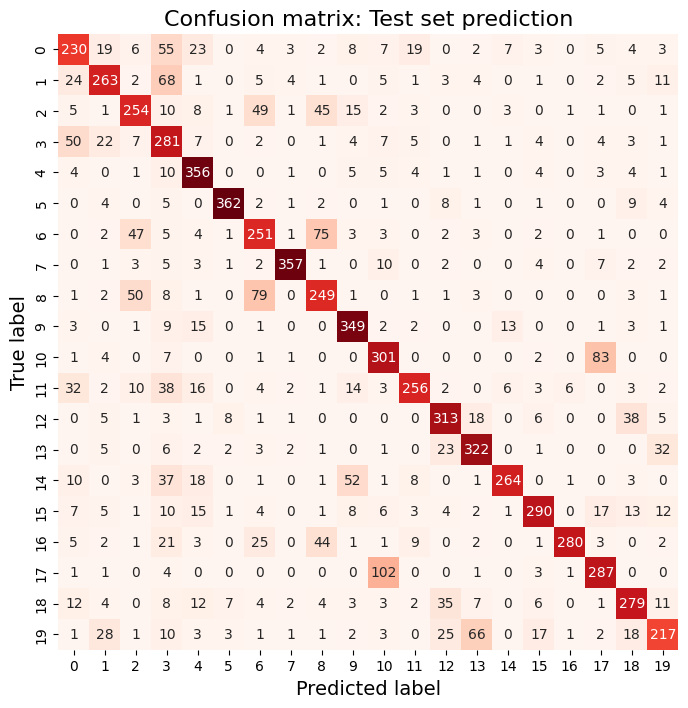

In [18]:
# Import necessary libraries

fig,ax=plt.subplots(figsize=(8,8))
sns.heatmap(sklearn.metrics.confusion_matrix(y_test,pred),annot=True,cbar=False,fmt='d',cmap='Reds')
ax.set_ylabel('True label',fontsize=14)
ax.set_xlabel('Predicted label',fontsize=14)
ax.set_title('Confusion matrix: Test set prediction',fontsize=16);

#Observation and inference:
# Confusion Matrix for all 20 target levels based on test dataset

In [19]:
#Confusion Matrix report:

print('test dataset classification report:\n',sklearn.metrics.classification_report(y_test,pred),"\n")

#Observation and inference:
# With classification report we have got accuracy of 72%

### We can do deep diving wrt model building
### Further text cleaning like removing numders, non-english words, etc.
### Trying Advance word embedding methods like TF-IDF,GloVe,Word2Vec,Doc2Vec,Bert,etc. 
### Trying other classifications model like Stacking, RNN_LSTM, etc.
### With Above approaches we can make our model more roburst and highly accurate

test dataset classification report:
               precision    recall  f1-score   support

           0       0.60      0.57      0.59       400
           1       0.71      0.66      0.68       400
           2       0.65      0.64      0.64       400
           3       0.47      0.70      0.56       400
           4       0.73      0.89      0.80       400
           5       0.94      0.91      0.92       400
           6       0.57      0.63      0.60       400
           7       0.95      0.89      0.92       400
           8       0.58      0.62      0.60       400
           9       0.75      0.87      0.81       400
          10       0.65      0.75      0.70       400
          11       0.82      0.64      0.72       400
          12       0.75      0.78      0.76       400
          13       0.74      0.81      0.77       400
          14       0.89      0.66      0.76       400
          15       0.83      0.72      0.78       400
          16       0.97      0.70      0.81 

## Hidden Markov Model for POS tagging

### Hidden Markov Model (HMM) is a statistical Markov model in which the model states are hidden. It is important to understand that the state of the model, and not the parameters of the model, are hidden. A Markov model with fully known parameters is still called a HMM. While the model state may be hidden, the state-dependent output of the model is visible. Information about the state of the model can be gleaned from the probability distribution over possible output tokens because each model state creates a different distribution. A sequence of output tokens will provide insight into the sequence of states in a process known as pattern theory.

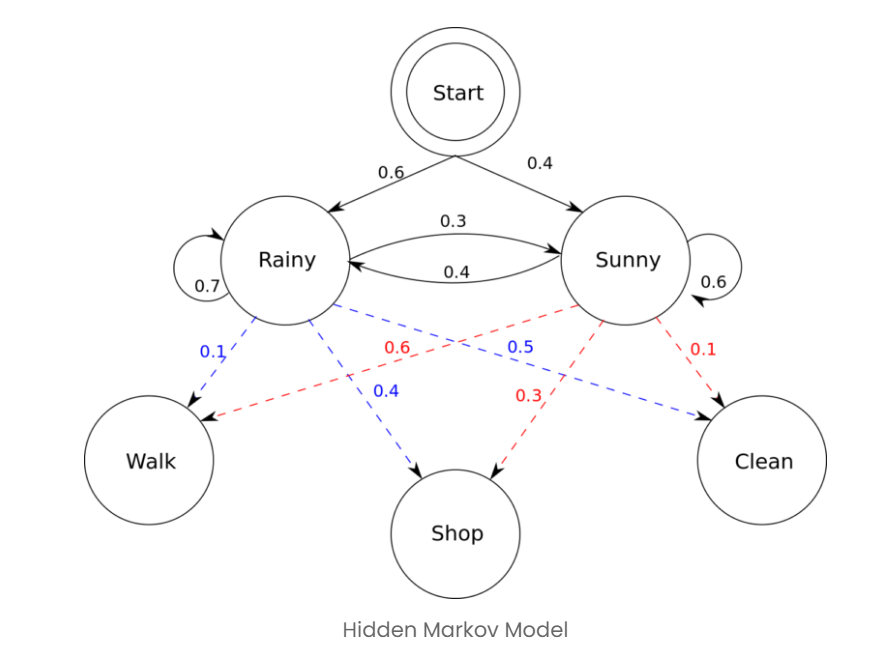

In [20]:
#Sample with 4 rows only
dat = data.head(4)
dat[['clean_post','tags']]

,clean_post,tags
0,causing behavior c datetime type precodetest public void sadness var datetime datetimeutcnow assertthatdatetime isequaltodatetimeparsedatetimetostring codepre failed precode expected 20111031 061244000 20111031 061244350 codepre wish know happening behind scenes tostring etc cause behavior edit seeing jon answer precodetest public void newsadness var datetime datetimeutcnow assertthatdatetime isequaltodatetimeparsedatetimetostring codepre result precodeexpected 20111031 120304161 20111031 063304161 codepre result capital small reading docs still unclear,c#
1,dynamic html load iframe aspnet 40 site users save entire html page backend database want load dynamic content div existing page content area couple things happen want css affect anything outside div first trying loading badly formed html would move images divs outside content area around lot html pages use base tag images links want base tag respected inside div solution going try use iframe set url another child page loads dynamic html page entirely wondering better solution,asp.net
2,convert float value minsec trying convert second minsec code precode ibactioncalcolaidsender float grandezzakb fieldgrandezza text floatvalue float velocitambps fieldvelocita text floatvalue float grandezzamb grandezzakb1000 float velocitakb velocitambps128 float seconditotali grandezzambvelocitakb float min seconditotali 60 nsstring risultato nsstring stringwithformat 02f minuti min labelrisultato settextrisultato codepre sorry english italian someone help already tried mod work float sorry code perfect newbie,objective-c
3,net framework 4 redistributable wondering get net framework 4 beta redistributable would like include cd distribute clients need install cd web necessary internet application suggestions appreciated thanks navin,.net


In [21]:
#Part-of-speech Tagging
#Part of speech(POS) tagging involved labeling the words with their respective part of speech ie. noun, adjective, verb, etc.

text = nltk.word_tokenize(dat['clean_post'][0])
nltk.pos_tag(text)

[('causing', 'VBG'),
 ('behavior', 'JJ'),
 ('c', 'NN'),
 ('datetime', 'NN'),
 ('type', 'JJ'),
 ('precodetest', 'JJS'),
 ('public', 'JJ'),
 ('void', 'NN'),
 ('sadness', 'NN'),
 ('var', 'NN'),
 ('datetime', 'NN'),
 ('datetimeutcnow', 'JJ'),
 ('assertthatdatetime', 'RB'),
 ('isequaltodatetimeparsedatetimetostring', 'VBG'),
 ('codepre', 'NN'),
 ('failed', 'VBD'),
 ('precode', 'NN'),
 ('expected', 'VBD'),
 ('20111031', 'CD'),
 ('061244000', 'CD'),
 ('20111031', 'CD'),
 ('061244350', 'CD'),
 ('codepre', 'JJ'),
 ('wish', 'NN'),
 ('know', 'VBP'),
 ('happening', 'VBG'),
 ('behind', 'IN'),
 ('scenes', 'NNS'),
 ('tostring', 'VBG'),
 ('etc', 'NN'),
 ('cause', 'NN'),
 ('behavior', 'NN'),
 ('edit', 'NN'),
 ('seeing', 'VBG'),
 ('jon', 'NN'),
 ('answer', 'NN'),
 ('precodetest', 'VBP'),
 ('public', 'JJ'),
 ('void', 'NN'),
 ('newsadness', 'NN'),
 ('var', 'NN'),
 ('datetime', 'NN'),
 ('datetimeutcnow', 'JJ'),
 ('assertthatdatetime', 'RB'),
 ('isequaltodatetimeparsedatetimetostring', 'VBG'),
 ('codepre', 

In [22]:
# Function creation for POS tagging

def visualize_pos(text):
    pos_tags = ["PRON", "VERB", "NOUN", "ADJ", "ADP","ADV", "CONJ", "DET", "NUM", "PRT"]
    
    # Tokenize text and pos tag each token
    tokens = twt().tokenize(text)
    tags = nltk.pos_tag(tokens, tagset = "universal")

    # Get start and end index (span) for each token
    span_generator = twt().span_tokenize(text)
    spans = [span for span in span_generator]

    # Create dictionary with start index, end index, 
    # pos_tag for each token
    ents = []
    for tag, span in zip(tags, spans):
        if tag[1] in pos_tags:
            ents.append({"start" : span[0], 
                         "end" : span[1], 
                         "label" : tag[1] })

    doc = {"text" : text, "ents" : ents}

    colors = {"PRON": "blueviolet",
              "VERB": "lightpink",
              "NOUN": "turquoise",
              "ADJ" : "lime",
              "ADP" : "khaki",
              "ADV" : "orange",
              "CONJ" : "cornflowerblue",
              "DET" : "forestgreen",
              "NUM" : "salmon",
              "PRT" : "yellow"}
    
    options = {"ents" : pos_tags, "colors" : colors}
    
    displacy.render(doc,  style = "ent",  options = options,  manual = True,)

In [23]:
visualize_pos(dat['clean_post'][0])

In [24]:
visualize_pos(dat['clean_post'][1])

In [25]:
visualize_pos(dat['clean_post'][2])

In [26]:
visualize_pos(dat['clean_post'][3])

### Thank you
## @Copyright Lipika Sharma